<a href="https://colab.research.google.com/github/rbdus0715/Machine-Learning/blob/main/study/sklearn/regression_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **회귀 트리란?**

- 트리를 기반으로 하는 회귀 방식

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor # 랜덤 포레스트 회귀 트리

df = pd.read_csv('BostonHousing.csv')
df.columns = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'price']

X = df.drop('price', axis=1, inplace=False)
y = df['price']

In [12]:
rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(avg_rmse)

4.422538982804892


In [13]:
def get_model_cv_prediction(model, X, y):
    neg_mse_scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)
    rmse_scores = np.sqrt(-1*neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('##### ', model.__class__.__name__, ' #####')
    print('5번 교차 검증의 평균 rmse : ', avg_rmse)

### 결정트리, GBM, XGBoost, LightGBM의 Regressor 모두 사용해보기

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000, verbose=-1)

models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:
    get_model_cv_prediction(model, X, y)

#####  DecisionTreeRegressor  #####
5번 교차 검증의 평균 rmse :  5.977957424580515
#####  RandomForestRegressor  #####
5번 교차 검증의 평균 rmse :  4.422538982804892
#####  GradientBoostingRegressor  #####
5번 교차 검증의 평균 rmse :  4.26899822168126
#####  XGBRegressor  #####
5번 교차 검증의 평균 rmse :  4.251080362834295
#####  LGBMRegressor  #####
5번 교차 검증의 평균 rmse :  4.646441191925675


<Axes: >

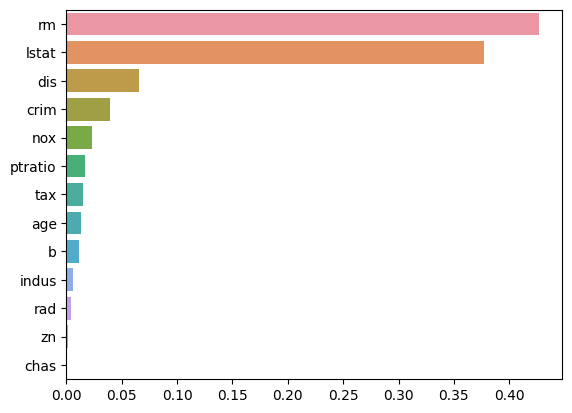

In [22]:
import seaborn as sns

rf_reg.fit(X, y)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

### 회귀 트리 regressor가 어떻게 예측값을 판단하는지 선형 회귀와 비교하여 시각화

(100, 2)


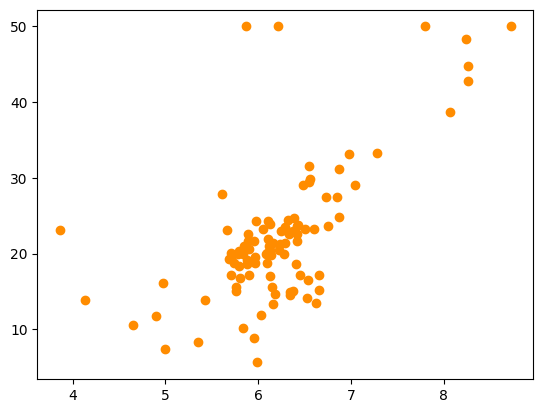

In [23]:
df = df[['rm', 'price']]
df = df.sample(n=100, random_state=0) # 100개만 샘플링
print(df.shape)
plt.figure()
plt.scatter(df.rm, df.price, c='darkorange')

In [24]:
import numpy as np
from sklearn.linear_model import LinearRegression

lr_reg = LinearRegression()
dt_reg2 = DecisionTreeRegressor(max_depth=2)
dt_reg7 = DecisionTreeRegressor(max_depth=7)

# 실제 예측을 적용할 테스트용 데이터 세트 준비
X_test = np.arange(4.5, 8.5, 0.04).reshape(-1, 1)

X = df['rm'].values.reshape(-1, 1)
y = df['price'].values.reshape(-1, 1)

lr_reg.fit(X, y)
dt_reg2.fit(X, y)
dt_reg7.fit(X, y)

pred_lr = lr_reg.predict(X_test)
pred_dt2 = dt_reg2.predict(X_test)
pred_dt7 = dt_reg7.predict(X_test)

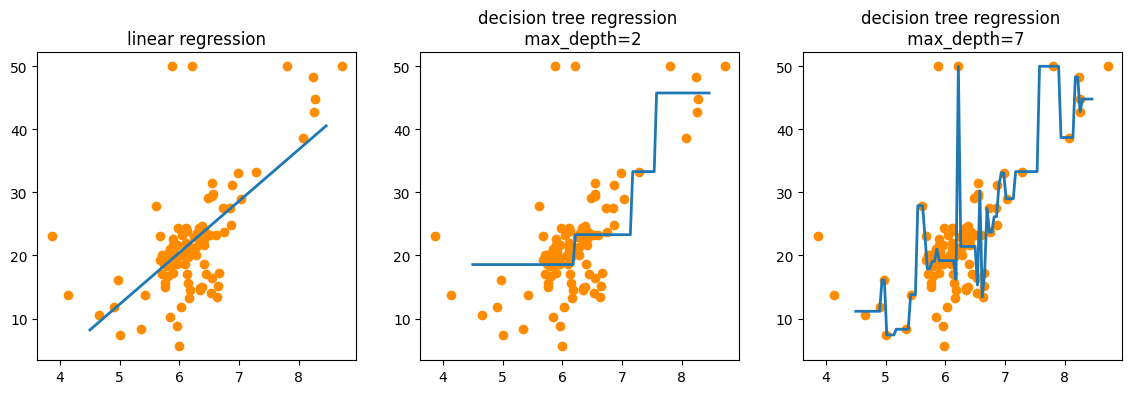

In [25]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14, 4), ncols=3)

ax1.set_title('linear regression')
ax1.scatter(df.rm, df.price, c='darkorange')
ax1.plot(X_test, pred_lr, label='linear', linewidth=2)

ax2.set_title('decision tree regression \n max_depth=2')
ax2.scatter(df.rm, df.price, c='darkorange')
ax2.plot(X_test, pred_dt2, label='max_depth:2', linewidth=2)

ax3.set_title('decision tree regression \n max_depth=7')
ax3.scatter(df.rm, df.price, c='darkorange')
ax3.plot(X_test, pred_dt7, label='max_depth:7', linewidth=2)